In [ ]:
# Entrega em Grupo
# Escolha 4 setores e 5 ações por setor no mercado e construa a fronteira eficiente
#  Justifique sua Resposta e o intervalo de dados usado.

In [1]:
# !pip install yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf
## Extração de preços

In [40]:
#cyre3 - maior liquidez
#mdne3 - maior cresc receita 5 anos
#mtre3 - menor p/vp
#cury3 - maior roe
#jhsf - melhor margem liq
tickers = ['EGIE3.SA', 'TGMA3.SA', 'SAPR3.SA', 'PNVL3.SA', 'CPLE6.SA'] # tentar novamente caso algum ticker dê errado

precos = yf.download(tickers, start = '2020-06-01')

[*********************100%%**********************]  5 of 5 completed


In [42]:
df1=precos['Adj Close']


In [43]:
df1.head()

,CPLE6.SA,EGIE3.SA,PNVL3.SA,SAPR3.SA,TGMA3.SA
Date,,,,,
2020-06-01,4.396908,32.574333,23.071121,4.991884,16.571949
2020-06-02,4.556436,32.965935,23.166851,5.253324,17.571472
2020-06-03,4.628436,33.592525,23.645506,5.669995,18.335819
2020-06-04,4.608671,33.443707,23.597639,5.727186,18.403011
2020-06-05,4.517612,33.428043,24.411352,5.555615,20.099684


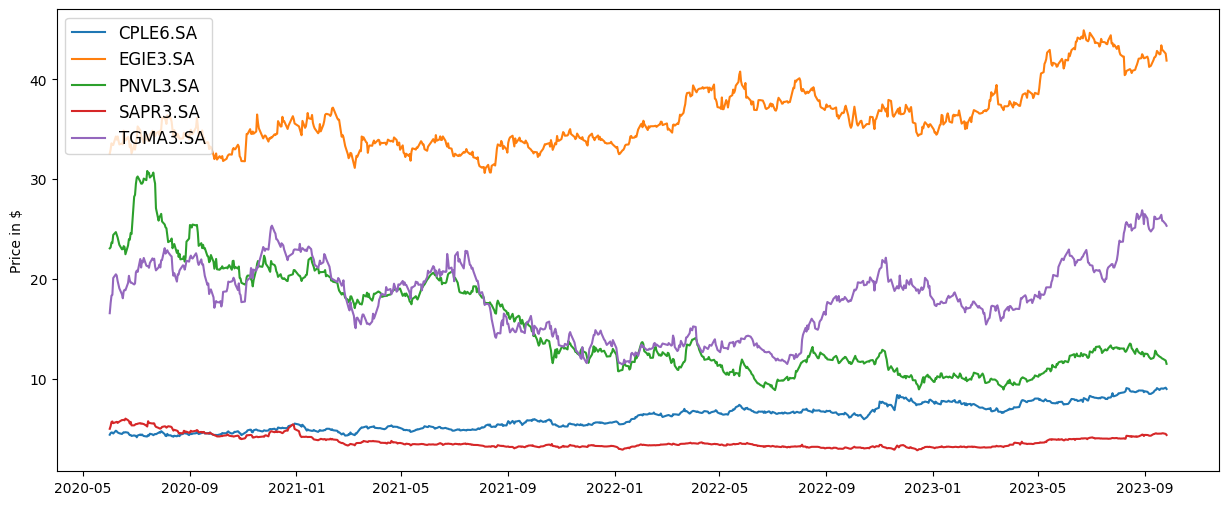

In [44]:
plt.figure(figsize=(15, 6))
for i in range(df1.shape[1]):
    plt.plot(df1.iloc[:,i], label=df1.columns.values[i])
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('Price in $')
plt.show()

In [45]:
#Calculate daily changes in the stocks' value
df2 = df1.pct_change()
#df.resample('Y').last().pct_change()
#Remove nan values at the first row of df2. Create a new dataframe df
df=df2.iloc[1:len(df2.index),:]
# Calculate annualized average return for each stock. Annualized average return = Daily average return * 252 business days.
r = np.mean(df,axis=0)*252

# Create a covariance matrix
covar = df.cov()

In [46]:
covar

,CPLE6.SA,EGIE3.SA,PNVL3.SA,SAPR3.SA,TGMA3.SA
CPLE6.SA,0.000378,0.000110,0.000108,0.000168,0.000125
EGIE3.SA,0.000110,0.000160,0.000094,0.000091,0.000097
PNVL3.SA,0.000108,0.000094,0.000565,0.000121,0.000257
SAPR3.SA,0.000168,0.000091,0.000121,0.000352,0.000129
TGMA3.SA,0.000125,0.000097,0.000257,0.000129,0.000682


<Axes: xlabel='Date'>

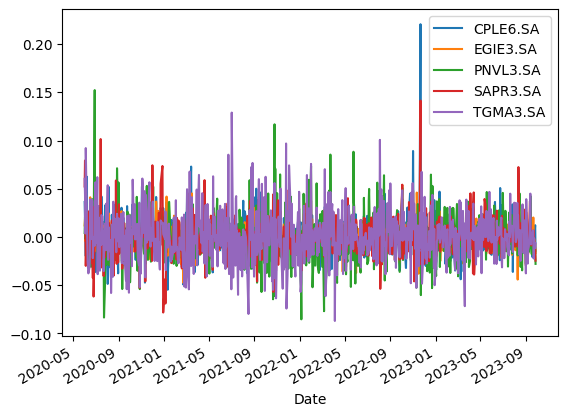

In [47]:
df2.plot()

In [48]:
#Define frequently used functions.
# r is each stock's return, w is the portion of each stock in our portfolio, and covar is the covariance matrix
# Rate of return
def ret(r,w):
    return r.dot(w)

# Risk level - or volatility
def vol(w,covar):
    return np.sqrt(np.dot(w,np.dot(w,covar))*252)

def sharpe (ret,vol):
    return ret/vol

In [49]:
# All weights, of course, must be between 0 and 1. Thus we set 0 and 1 as the boundaries.
from scipy.optimize import Bounds
bounds = Bounds(0, 1)

# The second boundary is the sum of weights.
from scipy.optimize import LinearConstraint
linear_constraint = LinearConstraint(np.ones((df2.shape[1],), dtype=int),1,1)

# Find a portfolio with the minimum risk.
from scipy.optimize import minimize

#Create x0, the first guess at the values of each stock's weight.
weights = np.ones(df2.shape[1])
x0 = weights/np.sum(weights)

#Define a function to calculate volatility
fun1 = lambda w: np.sqrt(np.dot(w,np.dot(w,covar)))

res = minimize(fun1, x0, method='trust-constr', constraints = linear_constraint,bounds = bounds)

#These are the weights of the stocks in the portfolio with the lowest level of risk possible.
w_min = res.x

np.set_printoptions(suppress = True, precision=2)
print(tickers)
print(w_min)
print('return: % .2f'% (ret(r,w_min)*100), 'risk: % .3f'% vol(w_min,covar))


['EGIE3.SA', 'TGMA3.SA', 'SAPR3.SA', 'PNVL3.SA', 'CPLE6.SA']
[0.08 0.66 0.07 0.15 0.04]
return:  8.36 risk:  0.187


In [50]:
#Define 1/Sharpe_ratio
fun2 = lambda w: np.sqrt(np.dot(w,np.dot(w,covar))*252)/r.dot(w)
res_sharpe = minimize(fun2,x0,method='trust-constr',constraints = linear_constraint,bounds = bounds)

#These are the weights of the stocks in the portfolio with the highest Sharpe ratio.
w_sharpe = res_sharpe.x
print(w_sharpe)
print('return: % .2f'% (ret(r,w_sharpe)*100), 'risk: % .3f'% vol(w_sharpe,covar))
print(*zip(tickers, w_sharpe))

[0.71 0.07 0.   0.   0.22]
return:  24.07 risk:  0.263
('EGIE3.SA', 0.7050340808021464) ('TGMA3.SA', 0.07482874926670031) ('SAPR3.SA', 4.66823278350058e-07) ('PNVL3.SA', 2.566081308636533e-07) ('CPLE6.SA', 0.2201364464997434)


[0.45 0.46 0.47 0.48 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56 0.57
 0.58 0.59 0.6  0.61 0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.67 0.68 0.69
 0.7  0.71 0.71 0.72 0.73 0.74 0.75 0.75 0.76 0.77 0.77 0.78 0.79 0.79
 0.8  0.81 0.81 0.82 0.82 0.83 0.83 0.84 0.84 0.85 0.85 0.86 0.86 0.86
 0.87 0.87 0.88 0.88 0.88 0.88 0.89 0.89 0.89 0.89 0.9  0.9  0.9  0.9
 0.9  0.9  0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91
 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.9  0.89
 0.88 0.87]


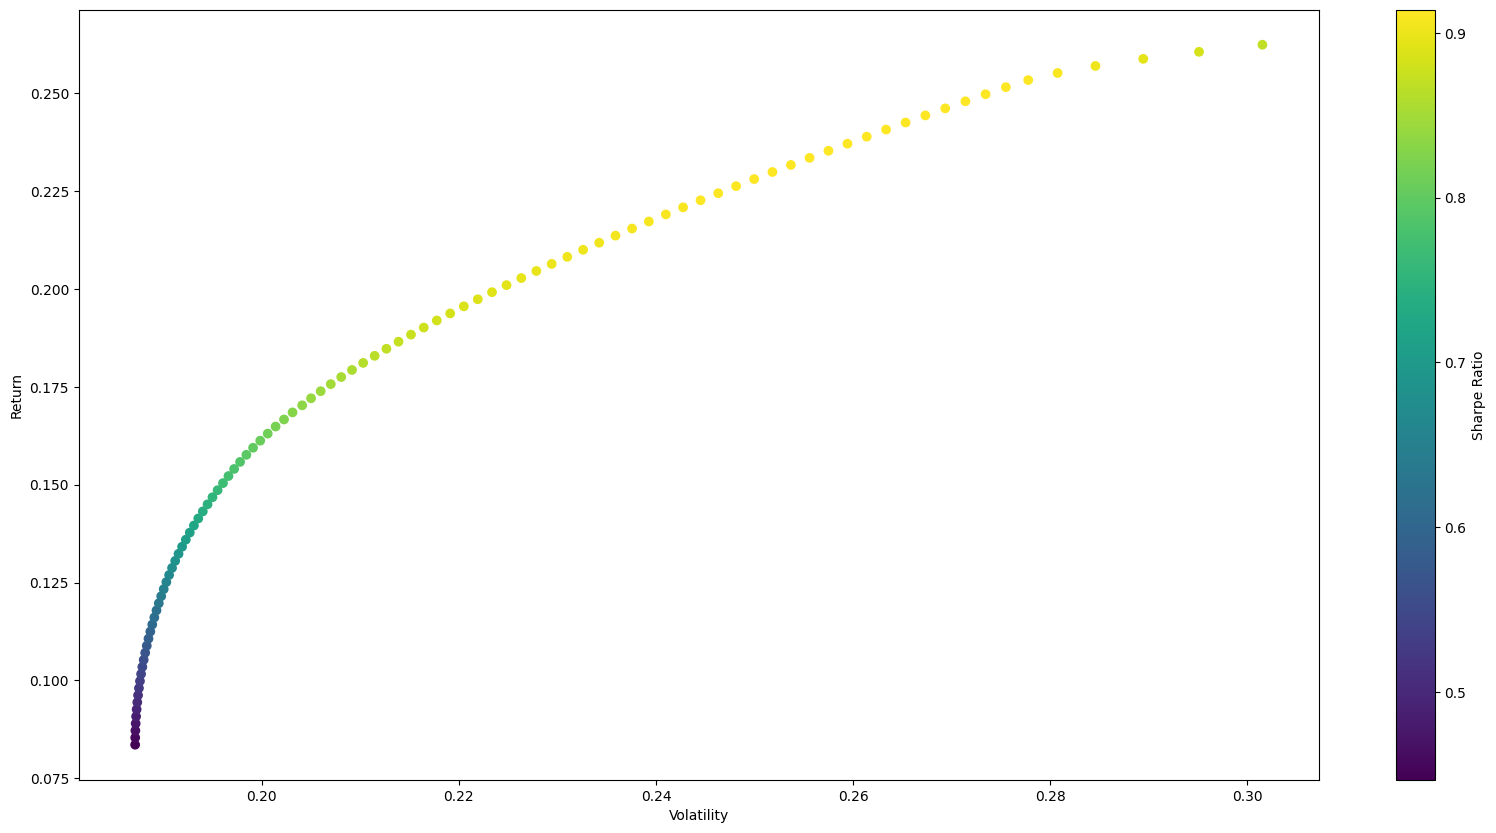

In [51]:
w = w_min
num_ports = 100
gap = (np.amax(r) - ret(r,w_min))/num_ports


all_weights = np.zeros((num_ports, len(df.columns)))
all_weights[0],all_weights[1]=w_min,w_sharpe
ret_arr = np.zeros(num_ports)
ret_arr[0],ret_arr[1]=ret(r,w_min),ret(r,w_sharpe)
vol_arr = np.zeros(num_ports)
vol_arr[0],vol_arr[1]=vol(w_min,covar),vol(w_sharpe,covar)

for i in range(num_ports):
    port_ret = ret(r,w) + i*gap
    double_constraint = LinearConstraint([np.ones(df2.shape[1]),r],[1,port_ret],[1,port_ret])

    #Create x0: initial guesses for weights.
    x0 = w_min
    #Define a function for portfolio volatility.
    fun = lambda w: np.sqrt(np.dot(w,np.dot(w,covar))*252)
    a = minimize(fun,x0,method='trust-constr',constraints = double_constraint,bounds = bounds)

    all_weights[i,:]=a.x
    ret_arr[i]=port_ret
    vol_arr[i]=vol(a.x,covar)

sharpe_arr = ret_arr/vol_arr
print(sharpe_arr)
plt.figure(figsize=(20,10))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.show()